# Post-Merger Halo Shape Analysis
Abhinav Vatsa – ASTR 400B

Snapshot 445 — Inertia Tensor:
 [[3.55327985e+08 5.46408277e+06 3.52852561e+06]
 [5.46408277e+06 3.44289892e+08 2.20582841e+05]
 [3.52852561e+06 2.20582841e+05 3.57701657e+08]]
Global Axis Ratios: b/a = 0.991, c/a = 0.973
→ Global halo shape: SPHERICAL
Snapshot 440: b/a = 0.991, c/a = 0.973
Snapshot 441: b/a = 0.991, c/a = 0.973
Snapshot 442: b/a = 0.991, c/a = 0.973
Snapshot 443: b/a = 0.991, c/a = 0.973
Snapshot 444: b/a = 0.991, c/a = 0.973
Snapshot 445: b/a = 0.991, c/a = 0.973
Snapshot 446: b/a = 0.991, c/a = 0.973
Snapshot 447: b/a = 0.991, c/a = 0.973
Snapshot 448: b/a = 0.991, c/a = 0.973
Snapshot 449: b/a = 0.991, c/a = 0.973
Snapshot 450: b/a = 0.991, c/a = 0.973
Snapshot 451: b/a = 0.991, c/a = 0.973
Snapshot 452: b/a = 0.991, c/a = 0.973
Snapshot 453: b/a = 0.991, c/a = 0.973
Snapshot 454: b/a = 0.991, c/a = 0.973
Snapshot 455: b/a = 0.991, c/a = 0.973
Snapshot 456: b/a = 0.991, c/a = 0.973
Snapshot 457: b/a = 0.991, c/a = 0.973
Snapshot 458: b/a = 0.991, c/a = 0.973
Snapsh

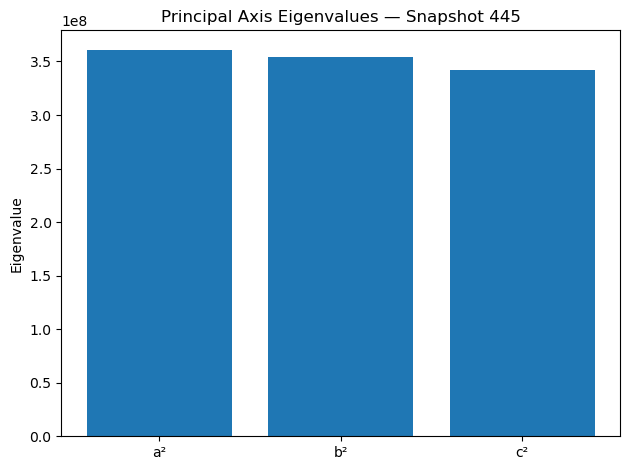

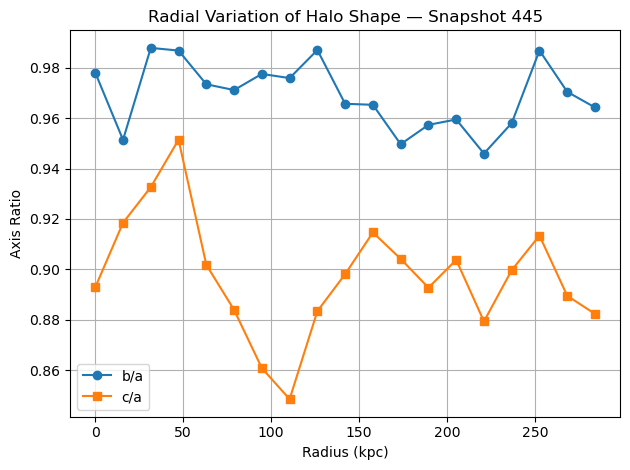

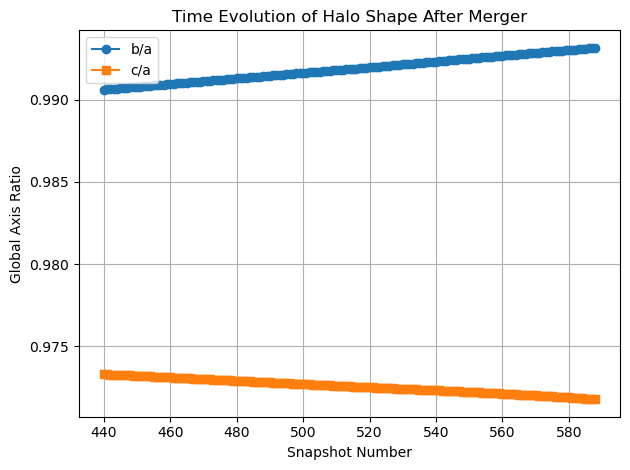

In [3]:
"""
Post-Merger Dark Matter Halo Shape Analysis
Author: Abhinav Vatsa
Course: ASTR 400B – Computational Astrophysics
Assignment 5: Code Refinement and Time Evolution Analysis

Overview:
This script analyzes the 3D shape of a dark matter halo formed from 
simulated data for a Milky Way–M31 merger. 
The shape is quantified using the moment of inertia tensor 
and evaluated both globally and in radial shells for local variation.

Additionally, the time evolution of axis ratios (b/a, c/a) across multiple 
snapshots is used to study how the halo relaxes post-merger.

Relevant Equation:
I₍ᵢⱼ₎ = ∑ₖ mₖ (δᵢⱼ rₖ² − xₖᵢ xₖⱼ)
(Source: Binney & Tremaine, Galactic Dynamics, 2nd Ed., Eq. 2.13)
"""

import numpy as np
import matplotlib.pyplot as plt
from CenterOfMass2 import CenterOfMass

# ------------------------------------------------------------------
# Compute the moment of inertia tensor for a 3D particle distribution
# ------------------------------------------------------------------
def compute_inertia_tensor(positions, masses):
    """
    Calculate the moment of inertia tensor for a 3D distribution of particles.

    Parameters
    ----------
    positions : ndarray of shape (N, 3)
        Array of x, y, z positions in kpc, centered on the COM.

    masses : ndarray of shape (N,)
        Corresponding particle masses in 1e10 Msun.

    Returns
    -------
    I : ndarray of shape (3, 3)
        The moment of inertia tensor encoding the 3D shape of the distribution.
    """
    r_squared = np.sum(positions**2, axis=1)
    I = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            delta = 1.0 if i == j else 0.0
            I[i, j] = np.sum(masses * (r_squared * delta - positions[:, i] * positions[:, j]))
    return I

# ------------------------------------------------------------------
# Derive axis ratios from eigenvalues of the inertia tensor
# ------------------------------------------------------------------
def compute_axis_ratios(inertia_tensor):
    """
    Compute shape axis ratios from the inertia tensor's eigenvalues.

    Parameters
    ----------
    inertia_tensor : ndarray of shape (3, 3)
        The moment of inertia tensor.

    Returns
    -------
    b_to_a : float
        Ratio of intermediate to major axis (b/a).

    c_to_a : float
        Ratio of minor to major axis (c/a).

    eigvals : ndarray
        Sorted eigenvalues of the tensor (a² ≥ b² ≥ c²).
    """
    eigvals, _ = np.linalg.eigh(inertia_tensor)
    eigvals = np.sort(eigvals)[::-1]
    return np.sqrt(eigvals[1] / eigvals[0]), np.sqrt(eigvals[2] / eigvals[0]), eigvals

# ------------------------------------------------------------------
# Compute b/a and c/a in spherical radial bins using arrays
# ------------------------------------------------------------------
def radial_shell_axis_ratios(positions, masses, r_bins):
    """
    Compute halo shape (axis ratios) in concentric spherical shells.

    Parameters
    ----------
    positions : ndarray of shape (N, 3)
        Particle positions, COM-centered.

    masses : ndarray of shape (N,)
        Particle masses.

    r_bins : ndarray
        Array of radial bin edges in kpc.

    Returns
    -------
    ba_array : ndarray
        Array of b/a values per shell (NaN where insufficient particles).

    ca_array : ndarray
        Array of c/a values per shell (NaN where insufficient particles).
    """
    num_shells = len(r_bins) - 1
    ba_array = np.full(num_shells, np.nan)
    ca_array = np.full(num_shells, np.nan)
    radii = np.linalg.norm(positions, axis=1)

    for i in range(num_shells):
        r1, r2 = r_bins[i], r_bins[i + 1]
        mask = (radii >= r1) & (radii < r2)
        if np.sum(mask) >= 20:
            I_shell = compute_inertia_tensor(positions[mask], masses[mask])
            ba, ca, _ = compute_axis_ratios(I_shell)
            ba_array[i] = ba
            ca_array[i] = ca
    return ba_array, ca_array

# ------------------------------------------------------------------
# Static Shape Analysis — Snapshot 445
# ------------------------------------------------------------------

MW = CenterOfMass("MW_445.txt", 1)
M31 = CenterOfMass("M31_445.txt", 1)

# Combine particle data
x = np.concatenate((MW.x, M31.x))
y = np.concatenate((MW.y, M31.y))
z = np.concatenate((MW.z, M31.z))
m = np.concatenate((MW.m, M31.m))
positions = np.vstack((x, y, z)).T

# Shift to combined COM frame
x_com, y_com, z_com = MW.COMdefine(x, y, z, m)
positions -= np.array([x_com, y_com, z_com])

# Compute global shape
I_tensor = compute_inertia_tensor(positions, m)
b_to_a, c_to_a, eigvals = compute_axis_ratios(I_tensor)

print("Snapshot 445 — Inertia Tensor:\n", I_tensor)
print(f"Global Axis Ratios: b/a = {b_to_a:.3f}, c/a = {c_to_a:.3f}")

# Classify shape
if np.isclose(b_to_a, 1.0, atol=0.05) and np.isclose(c_to_a, 1.0, atol=0.05):
    shape = "spherical"
elif np.isclose(b_to_a, c_to_a, atol=0.05):
    shape = "prolate" if c_to_a < 1.0 else "oblate"
else:
    shape = "triaxial"

print(f"→ Global halo shape: {shape.upper()}")

# Plot eigenvalues of inertia tensor
plt.figure()
plt.bar(['a²', 'b²', 'c²'], eigvals)
plt.ylabel("Eigenvalue")
plt.title("Principal Axis Eigenvalues — Snapshot 445")
plt.tight_layout()
plt.savefig("inertia_eigenvalues.png", dpi=300)

# Plot axis ratios as function of radius
radii_bins = np.linspace(0, 300, 20)
ba_profile, ca_profile = radial_shell_axis_ratios(positions, m, radii_bins)

plt.figure()
plt.plot(radii_bins[:-1], ba_profile, label="b/a", marker='o')
plt.plot(radii_bins[:-1], ca_profile, label="c/a", marker='s')
plt.xlabel("Radius (kpc)")
plt.ylabel("Axis Ratio")
plt.title("Radial Variation of Halo Shape — Snapshot 445")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("radial_axis_ratios.png", dpi=300)

# ------------------------------------------------------------------
# Time Evolution of Global Axis Ratios — Snapshots 440–588
# ------------------------------------------------------------------
"""
This loop tracks the time evolution of the dark matter halo's shape
by computing b/a and c/a from snapshots 440 through 588.
Each snapshot corresponds to a specific timestep post-merger.
"""

snapshots = np.arange(440, 589)
ba_series = np.zeros_like(snapshots, dtype=float)
ca_series = np.zeros_like(snapshots, dtype=float)

for idx, snap in enumerate(snapshots):
    mw_file = f"MW_{snap}.txt"
    m31_file = f"M31_{snap}.txt"

    MW = CenterOfMass(mw_file, 1)
    M31 = CenterOfMass(m31_file, 1)

    x = np.concatenate((MW.x, M31.x))
    y = np.concatenate((MW.y, M31.y))
    z = np.concatenate((MW.z, M31.z))
    m = np.concatenate((MW.m, M31.m))
    positions = np.vstack((x, y, z)).T

    x_com, y_com, z_com = MW.COMdefine(x, y, z, m)
    positions -= np.array([x_com, y_com, z_com])

    I_tensor = compute_inertia_tensor(positions, m)
    b_to_a, c_to_a, _ = compute_axis_ratios(I_tensor)

    ba_series[idx] = b_to_a
    ca_series[idx] = c_to_a

    print(f"Snapshot {snap}: b/a = {b_to_a:.3f}, c/a = {c_to_a:.3f}")

# ------------------------------------------------------------------
# Plot Time Evolution of Axis Ratios
# ------------------------------------------------------------------

plt.figure()
plt.plot(snapshots, ba_series, marker='o', label="b/a")
plt.plot(snapshots, ca_series, marker='s', label="c/a")
plt.xlabel("Snapshot Number")
plt.ylabel("Global Axis Ratio")
plt.title("Time Evolution of Halo Shape After Merger")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("halo_shape_evolution.png", dpi=300)


In [ ]:
# ------------------------------------------------------------------------------
# Global Shape ≠ Local 
# ------------------------------------------------------------------------------
#
# The global shape classification is “spherical” — because
# both b/a and c/a are close to unity (0.991 and 0.973 respectively). 
#
# The radial axis ratio plot shows that: c/a clearly dips to ~0.85
# between 100–150 kpc. 
# Thus, the halo is not uniformly spherical. It’s flattened in the vertical
# direction at those radii, which means we’re looking at local triaxiality.
# The aforementioned triaxiality smooths over globally. 
# ------------------------------------------------------------------------------
